パーセプトロンは複雑な関数を作れるが，重みを決める作業は人手

ニューラルネットワーク：重みを自動で学習！

本章ではニューラルネットワークの概要だけで学習はしない

バイアスは入力1の入力ノードとする．

ニューラルネットワークには，活性化関数がある！パーセプトロンとの違いの一つ

ステップ関数の実装

In [1]:
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

Numpyに対応したステップ関数の実装

In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int) # True Falseを1 0 に変換

ステップ関数のグラフを表示してみる

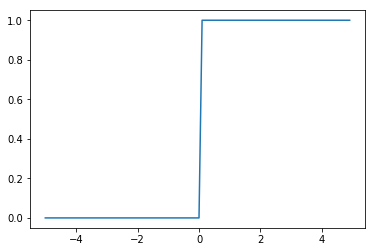

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # 0.1刻みで-5から4.9までを生成
y = step_function(x)
plt.plot(x, y)
plt.show()

シグモイド関数を実装してグラフ表示してみる

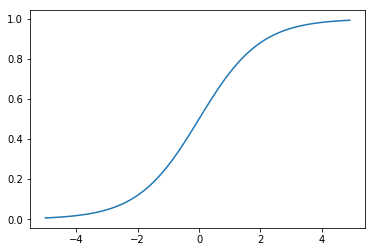

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid_function(x)
plt.plot(x, y)
plt.show()

ステップ関数は0か1しか取れないが，シグモイド関数は実数をとれる  
どちらも非線形関数である（出力が入力の定数倍＋定数でない）  
ニューラルネットワークでは，線形関数は使っても意味がない．  
線形関数を使うとすると，例えばある活性化関数を3回施したとき，その出力も定数倍になり，  
多層にする意味がなくなるから．  
→じゃあニューラルネットワークなんてやらなきゃいいんじゃないの？って思ってしまう  

線形でないほうがいいとか言ってるくせに，次にはReLU関数が出てくる．  
本書では主にReLU関数を使う．
しかし本章ではシグモイド関数を使う

## 多次元配列の計算

ndimで次元  
shapeで行数，列数（numpyでは1つのリストを1つの列ベクトルと考えるといいかも)  
dotで行列の積, 前の列数と次の行数があってなければエラー  
普通に行列計算をやっている．  
しかし，shapeを使ってdotができるかどうかの判定には，注意が必要．  
２次元配列の時と１次元配列の時ではshapeの出力が以下のように違う

In [5]:
import numpy as np
x1 = np.array([1, 2])
x2 = np.array([[1, 2]])
print(np.shape(x1))
print(np.shape(x2))

(2,)
(1, 2)


1次元配列の時は列ベクトルとしてshapeは認識するが，２次元配列の時は行ベクトルとしてshapeは認識する．  
と覚えておこう

In [6]:
w = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([[1, 2]])
print(np.shape(x))
print(np.shape(w))
np.dot(x, w)

(1, 2)
(2, 3)


array([[ 9, 12, 15]])

## 3層ニューラルネットワークの実装

$$ w_{12}^{(1)}$$  
An weight to $a_{1}^{(1)}$ from$x_{2}$  
1行2列ってこと？  
(1)は一層目を意味する．ここで，層は0から始まってることに注意

In [7]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2]) 
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 出力層の設定

回帰問題：恒等関数(identity function)  
分類問題：ソフトマックス関数  

ソフトマックス関数を普通に実装するとこんな感じ

In [8]:
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    exp_a_sum = np.sum(a)
    return exp_a / exp_a_sum

print(softmax(np.array([0.3, 0.5, 0.9])))
print(softmax(np.array([1010, 900, 1000])))

[0.79403459 0.96983604 1.44682536]
[inf inf inf]


これだと指数関数に1000などの大きな値が入ったとき，正確に計算できない．  
そこで以下のように，aの最大値を使って計算を簡単にする．

In [13]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    exp_a_sum = np.sum(exp_a)
    return exp_a / exp_a_sum

softmax(np.array([1010, 1000, 990]))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

ソフトマックス関数は和が1になるので，出力を確立ととらえられる  
ちなみにソフトマックス関数は計算量の関係で取り除かれることが多いっぽい  
しかし，学習の時にこいつが絡んでくる

## 手書き数字認識

上記のように出力を確立とすると，0～9までを出力層として，手書き数字認識ができる．

データセット読み込み

In [7]:
# もしロードできないときは，一旦シャットダウンして再起動
from mnist import load_mnist

# load_mnist?

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


mnist画像の表示

5
(784,)
(28, 28)


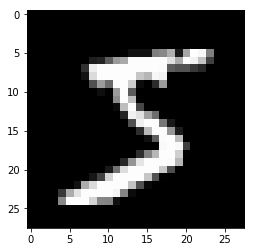

In [12]:
%matplotlib inline
import numpy as np
from mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img)
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) #入力画像はflattenされているのでreshape!
print(img.shape)

img_show(img)

ニューラルネットワークで手書き文字推論

In [14]:
import numpy as np
from mnist import load_mnist
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    exp_a_sum = np.sum(exp_a)
    return exp_a / exp_a_sum

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:", str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9207


バッチ処理

In [18]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch) # 100行(インスタンス)が10列(1インスタンスの各確率)
    p = np.argmax(y_batch, axis=1) # 0軸目は列で最大のものを選ぶので728個出てきてしまう．普通は各特長量で最良のものを取るので，確かに0が列なのは自然
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:", str(float(accuracy_cnt)/len(x)))

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)
Accuracy: 0.9207


## まとめ

ニューラルネットワーク： 実数をネットワークで渡す  
パーセプトロン：True Falseをネットワークで渡す  
  
ステップ関数: パーセプトロン，閾値を超えているかどうかで0か1を返す  
シグモイド関数： expを使ってステップ関数を滑らかにしたもの  
恒等関数： 受け取った実数をそのまま返す，回帰問題に使う  
ソフトマックス関数： 受け取った実数を他のものと比較して確率で返す，MNISTなど分類問題に使う  